<a href="https://colab.research.google.com/github/guo8orou/practice/blob/main/%EC%97%B0%EB%A0%B9%EC%A0%84%EC%B2%98%EB%A6%AC%EC%99%80_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%EC%A1%B0%ED%95%A9_%EC%82%AC%EC%9A%A9%EC%9E%90%EC%A0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



#데이터 통합

더 다양한 랜포 조합 탐색 함수 정의...가 목표였는데 디버깅하다가 하루가 삭제되었어요

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
main_data = pd.read_csv('/content/drive/MyDrive/꿔8로우/data/서울시 개별사고정보(2010_2018).csv', sep=',', encoding='cp949')
main_data.head(4)

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,20100101,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상
1,20100101,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상
2,20100101,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상
3,20100101,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상


In [54]:
wt_data = pd.read_csv('/content/drive/MyDrive/꿔8로우/data/20102018날짜전처리.csv', sep=',', encoding='cp949')
wt_data.head(4)

,Unnamed: 0,발생일,발생년도,발생월,발생일자,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,0,2010-01-01,2010,1,1,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상
1,1,2010-01-01,2010,1,1,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상
2,2,2010-01-01,2010,1,1,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상
3,3,2010-01-01,2010,1,1,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상


#민정님, 지수님 데이터 파일 차이 비교

In [55]:
print((set(main_data.columns)-set(wt_data.columns)))
print((set(wt_data.columns)-set(main_data.columns)))

set()
{'발생월', 'Unnamed: 0', '발생일자', '발생년도'}


메인데이터를 쓰면 될 것 같습니다

In [56]:
main_data['발생일']=[str(i) for i in main_data['발생일']]
main_data['발생일_시간'] = main_data['발생일']+" "+main_data['발생시간']
main_data['발생일_시간_시군구'] = main_data['발생일']+" "+main_data['발생시간']+" "+main_data['발생지_시군구']
main_data['사고건수'] = [1 for i in main_data['발생일']]
main_data['발생일'] = pd.to_datetime(main_data['발생일'], format='%Y%m%d')
main_data['발생년도'] = main_data['발생일'].dt.year
main_data['발생월'] = main_data['발생일'].dt.month
main_data['발생일자'] = main_data['발생일'].dt.day

main_data.head(4)

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자
0,2010-01-01,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상,20100101 00시,20100101 00시 마포구,1,2010,1,1
1,2010-01-01,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상,20100101 00시,20100101 00시 동작구,1,2010,1,1
2,2010-01-01,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상,20100101 00시,20100101 00시 관악구,1,2010,1,1
3,2010-01-01,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상,20100101 00시,20100101 00시 강서구,1,2010,1,1


In [57]:
df=main_data[:] #이렇게 해야 주소 복사가 안된다는 말을 들었는데 list에만 해당되는 걸수도...

In [58]:
df.columns

Index(['발생일', '발생시간', '요일', '발생지_시군구', '사고내용', '법정동명', '사망자수', '중상자수', '경상자수',
       '부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태',
       '기상상태', '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도',
       '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도', '발생일_시간', '발생일_시간_시군구', '사고건수',
       '발생년도', '발생월', '발생일자'],
      dtype='object')

In [59]:
#일단 관심대상은 민정님 최종 모델에 포함된 변수들
fnames=['발생월','요일', '기상상태', '노면상태', '노면상태_대분류', '도로형태_대분류', '도로형태', '가해자차종', '피해자차종', '가해자연령', '사고유형_대분류',	'사고유형_중분류',	'사고유형', '가해자법규위반', '가해성별', '피해자성별', '피해자연령']

In [60]:
one_hot = pd.get_dummies(df[fnames])
data = pd.concat([df['발생일_시간'],df['사고건수'], one_hot],axis=1) #를 해보면...

In [61]:
data.head()

,발생일_시간,사고건수,발생월,요일_금,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화,기상상태_기타/불명,기상상태_눈,기상상태_맑음,기상상태_비,기상상태_안개,기상상태_흐림,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,노면상태_대분류_비포장,노면상태_대분류_포장,도로형태_대분류_교차로,도로형태_대분류_기타,도로형태_대분류_기타/불명,도로형태_대분류_단일로,도로형태_대분류_불명,도로형태_대분류_철길건널목,도로형태_고가도로위,도로형태_교량위,도로형태_교차로내,도로형태_교차로부근,도로형태_교차로횡단보도내,도로형태_기타,도로형태_기타/불명,도로형태_기타단일로,도로형태_불명,...,피해자연령_65세,피해자연령_66세,피해자연령_67세,피해자연령_68세,피해자연령_69세,피해자연령_6세,피해자연령_70세,피해자연령_71세,피해자연령_72세,피해자연령_73세,피해자연령_74세,피해자연령_75세,피해자연령_76세,피해자연령_77세,피해자연령_78세,피해자연령_79세,피해자연령_7세,피해자연령_80세,피해자연령_81세,피해자연령_82세,피해자연령_83세,피해자연령_84세,피해자연령_85세,피해자연령_86세,피해자연령_87세,피해자연령_88세,피해자연령_89세,피해자연령_8세,피해자연령_90세,피해자연령_91세,피해자연령_92세,피해자연령_93세,피해자연령_94세,피해자연령_95세,피해자연령_96세,피해자연령_97세,피해자연령_98세,피해자연령_99세,피해자연령_9세,피해자연령_불명
0,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#연령 변수는 범주화가 필요해보입니다

In [62]:
len(data.columns) #너무 많아!

331

In [63]:
 df.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자
0,2010-01-01,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상,20100101 00시,20100101 00시 마포구,1,2010,1,1
1,2010-01-01,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상,20100101 00시,20100101 00시 동작구,1,2010,1,1
2,2010-01-01,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상,20100101 00시,20100101 00시 관악구,1,2010,1,1
3,2010-01-01,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상,20100101 00시,20100101 00시 강서구,1,2010,1,1
4,2010-01-01,00시,금,구로구,경상,구로동,0,0,2,0,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33세,상해없음,승용차,남,55세,경상,20100101 00시,20100101 00시 구로구,1,2010,1,1


#연령 전처리 

In [64]:
def remove_unit(x):
  if x=='불명':
    return None
  else:
    return(int(x[:-1]))

In [65]:
df['가해자연령']=df['가해자연령'].apply(remove_unit)

In [66]:
df['피해자연령']=df['피해자연령'].apply(remove_unit)

In [67]:
max(df['가해자연령']) #엥?

117.0

In [68]:
df.가해자연령.value_counts() #불명 엄청 많은디...

55.0     9495
53.0     9472
54.0     9433
56.0     9415
52.0     9243
         ... 
1.0         1
100.0       1
113.0       1
106.0       1
117.0       1
Name: 가해자연령, Length: 99, dtype: int64

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

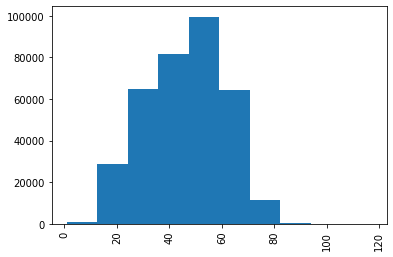

In [69]:
import matplotlib.pyplot as plt

plt.hist(df.가해자연령)
plt.xticks(rotation=90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

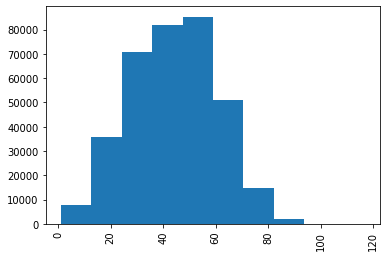

In [70]:
plt.hist(df.피해자연령)
plt.xticks(rotation=90)

연령분포를 보고 끊어봅시다

분포가 비슷한 것 같으니 20~70사이를 10씩 끊어 자체 라벨 인코딩을 하겠습니다

In [71]:
def age(x):
  if x=='불명': return None
  if x<=20: return 0
  if x<=30: return 1
  if x<=40: return 2
  if x<=50: return 3
  if x<=60: return 4
  if x<=70: return 5
  else: return 6

In [72]:
df['가해자연령대']=df['가해자연령'].apply(age)
df['피해자연령대']=df['피해자연령'].apply(age)

In [73]:
df.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,가해자연령대,피해자연령대
0,2010-01-01,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54.0,상해없음,이륜차,남,19.0,경상,20100101 00시,20100101 00시 마포구,1,2010,1,1,4,0
1,2010-01-01,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57.0,상해없음,승용차,남,39.0,중상,20100101 00시,20100101 00시 동작구,1,2010,1,1,4,2
2,2010-01-01,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51.0,경상,승용차,남,58.0,경상,20100101 00시,20100101 00시 관악구,1,2010,1,1,4,4
3,2010-01-01,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56.0,상해없음,승용차,남,55.0,경상,20100101 00시,20100101 00시 강서구,1,2010,1,1,4,4
4,2010-01-01,00시,금,구로구,경상,구로동,0,0,2,0,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33.0,상해없음,승용차,남,55.0,경상,20100101 00시,20100101 00시 구로구,1,2010,1,1,2,4


#다시 핫코딩

In [74]:
#일단 관심대상은 민정님 최종 모델에 포함된 변수들
fnames=['발생월','요일', '기상상태', '노면상태', '노면상태_대분류', '도로형태_대분류', '도로형태', '가해자차종', '피해자차종', '가해자연령대', '사고유형_대분류',	'사고유형_중분류',	'사고유형', '가해자법규위반', '가해성별', '피해자성별', '피해자연령대']

https://stackoverflow.com/questions/65722374/one-hot-encoding-in-random-forest-classifier
갑자기 읽게된 글

변수가 길어지면 모델에 좋지 않으니 label encoding (특히 학위 등 순서가 있는 변수의 경우)가 추천된다 합니다

In [75]:
#라벨 인코딩의 다른 방법

'''
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 

df['가해자연령_라벨']= label.fit_transform(block['가해자연령대']) 
df['가해자연령_라벨']= label.fit_transform(block['가해자연령대'])
'''

"\nfrom sklearn import preprocessing \nlabel = preprocessing.LabelEncoder() \n\ndf['가해자연령_라벨']= label.fit_transform(block['가해자연령대']) \ndf['가해자연령_라벨']= label.fit_transform(block['가해자연령대'])\n"

In [76]:
data.head()

,발생일_시간,사고건수,발생월,요일_금,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화,기상상태_기타/불명,기상상태_눈,기상상태_맑음,기상상태_비,기상상태_안개,기상상태_흐림,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,노면상태_대분류_비포장,노면상태_대분류_포장,도로형태_대분류_교차로,도로형태_대분류_기타,도로형태_대분류_기타/불명,도로형태_대분류_단일로,도로형태_대분류_불명,도로형태_대분류_철길건널목,도로형태_고가도로위,도로형태_교량위,도로형태_교차로내,도로형태_교차로부근,도로형태_교차로횡단보도내,도로형태_기타,도로형태_기타/불명,도로형태_기타단일로,도로형태_불명,...,피해자연령_65세,피해자연령_66세,피해자연령_67세,피해자연령_68세,피해자연령_69세,피해자연령_6세,피해자연령_70세,피해자연령_71세,피해자연령_72세,피해자연령_73세,피해자연령_74세,피해자연령_75세,피해자연령_76세,피해자연령_77세,피해자연령_78세,피해자연령_79세,피해자연령_7세,피해자연령_80세,피해자연령_81세,피해자연령_82세,피해자연령_83세,피해자연령_84세,피해자연령_85세,피해자연령_86세,피해자연령_87세,피해자연령_88세,피해자연령_89세,피해자연령_8세,피해자연령_90세,피해자연령_91세,피해자연령_92세,피해자연령_93세,피해자연령_94세,피해자연령_95세,피해자연령_96세,피해자연령_97세,피해자연령_98세,피해자연령_99세,피해자연령_9세,피해자연령_불명
0,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20100101 00시,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
len(data.columns)

331

In [78]:
df.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,가해자연령대,피해자연령대
0,2010-01-01,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54.0,상해없음,이륜차,남,19.0,경상,20100101 00시,20100101 00시 마포구,1,2010,1,1,4,0
1,2010-01-01,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57.0,상해없음,승용차,남,39.0,중상,20100101 00시,20100101 00시 동작구,1,2010,1,1,4,2
2,2010-01-01,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51.0,경상,승용차,남,58.0,경상,20100101 00시,20100101 00시 관악구,1,2010,1,1,4,4
3,2010-01-01,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56.0,상해없음,승용차,남,55.0,경상,20100101 00시,20100101 00시 강서구,1,2010,1,1,4,4
4,2010-01-01,00시,금,구로구,경상,구로동,0,0,2,0,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33.0,상해없음,승용차,남,55.0,경상,20100101 00시,20100101 00시 구로구,1,2010,1,1,2,4


In [79]:
'''for x in fsets:
  fset=list(x)
  X_train = data[(data['발생년도']<2018)][fset]
  X_test = data[(data['발생년도']==2018)][fset]
  forest_fit(fset)'''

"for x in fsets:\n  fset=list(x)\n  X_train = data[(data['발생년도']<2018)][fset]\n  X_test = data[(data['발생년도']==2018)][fset]\n  forest_fit(fset)"

In [80]:
df.노면상태_대분류.unique()

array(['포장', '비포장'], dtype=object)

In [81]:
df.노면상태.unique()

array(['젖음/습기', '서리/결빙', '건조', '적설', '기타', '해빙', '침수'], dtype=object)

#노면, 

In [82]:
#일단 관심대상은 민정님 최종 모델에 포함된 변수들 중 사고 이전에 주어지는 정보들
fnames=['기상상태', '노면상태', '노면상태_대분류', '도로형태_대분류', '도로형태', '가해자차종', '피해자차종', '가해성별', '피해자성별']

In [83]:
list(set(df.columns)-set(fnames)) #핫코딩 하지 않는 변수들

['부상신고자수',
 '요일',
 '사고내용',
 '사고유형',
 '발생지_시군구',
 '사고유형_대분류',
 '발생일_시간_시군구',
 '사고유형_중분류',
 '가해자신체상해정도',
 '피해자연령',
 '중상자수',
 '경상자수',
 '발생일_시간',
 '가해자법규위반',
 '발생년도',
 '가해자연령',
 '발생일',
 '사망자수',
 '발생시간',
 '법정동명',
 '발생월',
 '피해자신체상해정도',
 '피해자연령대',
 '가해자연령대',
 '사고건수',
 '발생일자']

In [84]:
#이친구들은 핫코딩을 하겠습니다
one_hot = pd.get_dummies(df[fnames])
data = pd.concat([df['발생년도'],df['사고건수'], one_hot],axis=1) #를 해보면...

In [85]:
data.head()

,발생년도,사고건수,기상상태_기타/불명,기상상태_눈,기상상태_맑음,기상상태_비,기상상태_안개,기상상태_흐림,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,노면상태_대분류_비포장,노면상태_대분류_포장,도로형태_대분류_교차로,도로형태_대분류_기타,도로형태_대분류_기타/불명,도로형태_대분류_단일로,도로형태_대분류_불명,도로형태_대분류_철길건널목,도로형태_고가도로위,도로형태_교량위,도로형태_교차로내,도로형태_교차로부근,도로형태_교차로횡단보도내,도로형태_기타,도로형태_기타/불명,도로형태_기타단일로,도로형태_불명,도로형태_지하차도(도로)내,도로형태_철길건널목,도로형태_터널안,도로형태_횡단보도부근,도로형태_횡단보도상,가해자차종_개인형이동수단(PM),가해자차종_건설기계,가해자차종_기타,가해자차종_농기계,가해자차종_불명,가해자차종_사륜오토바이(ATV),가해자차종_승용차,가해자차종_승합차,가해자차종_원동기장치자전거,가해자차종_이륜차,가해자차종_자전거,가해자차종_특수차,가해자차종_화물차,피해자차종_개인형이동수단(PM),피해자차종_건설기계,피해자차종_기타,피해자차종_농기계,피해자차종_보행자,피해자차종_불명,피해자차종_사륜오토바이(ATV),피해자차종_승용차,피해자차종_승합차,피해자차종_없음,피해자차종_열차,피해자차종_원동기장치자전거,피해자차종_이륜차,피해자차종_자전거,피해자차종_특수차,피해자차종_화물차,가해성별_기타불명,가해성별_남,가해성별_여,피해자성별_기타불명,피해자성별_남,피해자성별_없음,피해자성별_여
0,2010,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,2010,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2010,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,2010,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,2010,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [86]:
len(data.columns) #일단 해보지요...

73

In [87]:
pd.crosstab([df.가해자연령대], [df.사고건수], dropna=False).style.background_gradient(cmap='Purples')
#None (Null)은 포함되지 않았습니다

사고건수,1
가해자연령대,
0,16160
1,47225
2,61311
3,76710
4,89762
5,48402
6,22727


In [88]:
pd.crosstab([df.피해자연령대], [df.사고건수], dropna=False).style.background_gradient(cmap='Purples')

#2가 3~40입니다

사고건수,1
피해자연령대,
0,27929
1,52223
2,66721
3,72025
4,75085
5,38432
6,29882




---



#랜덤포레스트

#top5

랜덤포레스트 빠른 성적 & 상위 점수 변수 확인

앞으로 또 변수 추가해서 모델 확인할 때 종종 쓸 것 같아서 아예 만들 생각으로,,

In [89]:
from itertools import combinations as cm
import numpy as np #squeeze로 차원 제거 해결이 안되네요...
list(cm(fnames,2))

[('기상상태', '노면상태'),
 ('기상상태', '노면상태_대분류'),
 ('기상상태', '도로형태_대분류'),
 ('기상상태', '도로형태'),
 ('기상상태', '가해자차종'),
 ('기상상태', '피해자차종'),
 ('기상상태', '가해성별'),
 ('기상상태', '피해자성별'),
 ('노면상태', '노면상태_대분류'),
 ('노면상태', '도로형태_대분류'),
 ('노면상태', '도로형태'),
 ('노면상태', '가해자차종'),
 ('노면상태', '피해자차종'),
 ('노면상태', '가해성별'),
 ('노면상태', '피해자성별'),
 ('노면상태_대분류', '도로형태_대분류'),
 ('노면상태_대분류', '도로형태'),
 ('노면상태_대분류', '가해자차종'),
 ('노면상태_대분류', '피해자차종'),
 ('노면상태_대분류', '가해성별'),
 ('노면상태_대분류', '피해자성별'),
 ('도로형태_대분류', '도로형태'),
 ('도로형태_대분류', '가해자차종'),
 ('도로형태_대분류', '피해자차종'),
 ('도로형태_대분류', '가해성별'),
 ('도로형태_대분류', '피해자성별'),
 ('도로형태', '가해자차종'),
 ('도로형태', '피해자차종'),
 ('도로형태', '가해성별'),
 ('도로형태', '피해자성별'),
 ('가해자차종', '피해자차종'),
 ('가해자차종', '가해성별'),
 ('가해자차종', '피해자성별'),
 ('피해자차종', '가해성별'),
 ('피해자차종', '피해자성별'),
 ('가해성별', '피해자성별')]

In [90]:
list(cm(fnames,2))[1]

('기상상태', '노면상태_대분류')

In [91]:
for x in list(cm(fnames,2))[1]:
  if type(x)==str:
    print('Yes')

Yes
Yes


In [92]:
cols=data.columns

In [93]:
cols #아 생각보다 아주 많지는 않으니 눈 분류 노가다 합시다

#발생년도, 사고건수, 기상상태, 노면상태, 노면상태_대분류, 도로형태_대분류, 도로형태_, 가해자차종, 피해자차종, 피해자 성별, 가해자 성별

Index(['발생년도', '사고건수', '기상상태_기타/불명', '기상상태_눈', '기상상태_맑음', '기상상태_비', '기상상태_안개',
       '기상상태_흐림', '노면상태_건조', '노면상태_기타', '노면상태_서리/결빙', '노면상태_적설', '노면상태_젖음/습기',
       '노면상태_침수', '노면상태_해빙', '노면상태_대분류_비포장', '노면상태_대분류_포장', '도로형태_대분류_교차로',
       '도로형태_대분류_기타', '도로형태_대분류_기타/불명', '도로형태_대분류_단일로', '도로형태_대분류_불명',
       '도로형태_대분류_철길건널목', '도로형태_고가도로위', '도로형태_교량위', '도로형태_교차로내', '도로형태_교차로부근',
       '도로형태_교차로횡단보도내', '도로형태_기타', '도로형태_기타/불명', '도로형태_기타단일로', '도로형태_불명',
       '도로형태_지하차도(도로)내', '도로형태_철길건널목', '도로형태_터널안', '도로형태_횡단보도부근', '도로형태_횡단보도상',
       '가해자차종_개인형이동수단(PM)', '가해자차종_건설기계', '가해자차종_기타', '가해자차종_농기계', '가해자차종_불명',
       '가해자차종_사륜오토바이(ATV)', '가해자차종_승용차', '가해자차종_승합차', '가해자차종_원동기장치자전거',
       '가해자차종_이륜차', '가해자차종_자전거', '가해자차종_특수차', '가해자차종_화물차', '피해자차종_개인형이동수단(PM)',
       '피해자차종_건설기계', '피해자차종_기타', '피해자차종_농기계', '피해자차종_보행자', '피해자차종_불명',
       '피해자차종_사륜오토바이(ATV)', '피해자차종_승용차', '피해자차종_승합차', '피해자차종_없음', '피해자차종_열차',
       '피해자차종_원동기장치자전거', '피해자차종_이륜차', '피해자차종_자전거', '피해자차종_특수차', '피해자차종_화물차',
      

In [94]:
fnames=[ '발생년도', '사고건수', ['기상상태_기타/불명', '기상상태_눈', '기상상태_맑음', '기상상태_비', '기상상태_안개',
       '기상상태_흐림'], ['노면상태_건조', '노면상태_기타', '노면상태_서리/결빙', '노면상태_적설', '노면상태_젖음/습기',
       '노면상태_침수', '노면상태_해빙'], ['노면상태_대분류_비포장', '노면상태_대분류_포장'], ['도로형태_대분류_교차로',
       '도로형태_대분류_기타', '도로형태_대분류_기타/불명', '도로형태_대분류_단일로', '도로형태_대분류_불명',
       '도로형태_대분류_철길건널목'],['도로형태_고가도로위', '도로형태_교량위', '도로형태_교차로내', '도로형태_교차로부근',
       '도로형태_교차로횡단보도내', '도로형태_기타', '도로형태_기타/불명', '도로형태_기타단일로', '도로형태_불명',
       '도로형태_지하차도(도로)내', '도로형태_철길건널목', '도로형태_터널안', '도로형태_횡단보도부근', '도로형태_횡단보도상'],
       ['가해자차종_개인형이동수단(PM)', '가해자차종_건설기계', '가해자차종_기타', '가해자차종_농기계', '가해자차종_불명',
       '가해자차종_사륜오토바이(ATV)', '가해자차종_승용차', '가해자차종_승합차', '가해자차종_원동기장치자전거',
       '가해자차종_이륜차', '가해자차종_자전거', '가해자차종_특수차', '가해자차종_화물차'], ['피해자차종_개인형이동수단(PM)',
       '피해자차종_건설기계', '피해자차종_기타', '피해자차종_농기계', '피해자차종_보행자', '피해자차종_불명',
       '피해자차종_사륜오토바이(ATV)', '피해자차종_승용차', '피해자차종_승합차', '피해자차종_없음', '피해자차종_열차',
       '피해자차종_원동기장치자전거', '피해자차종_이륜차', '피해자차종_자전거', '피해자차종_특수차', '피해자차종_화물차'], 
        ['가해성별_기타불명', '가해성별_남', '가해성별_여', '피해자성별_기타불명', '피해자성별_남', '피해자성별_없음','피해자성별_여']]

In [95]:
fnames[-1]

['가해성별_기타불명',
 '가해성별_남',
 '가해성별_여',
 '피해자성별_기타불명',
 '피해자성별_남',
 '피해자성별_없음',
 '피해자성별_여']

#디버깅 어떻게 하...

In [51]:
#CV까지 쓰면 너무 무거워져서 빼고 합시다...
#CV를 빼면 모델 하나당 2초정도 걸립니다

#이제부턴 성적을 기록하기 위해 forest_top5를 정의하겠습니다
#2018년까지의 발생년도, 사고건수를 포함하며 다른 변수들에 결격사유가 없는 data(df)만 준비되면 사용 가능
#fnames는 사용할 변수 

def forest_top5(data, fnames, k):

  from sklearn.ensemble import RandomForestRegressor
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import numpy as np

  y_train = data[(data['발생년도']<2018)]['사고건수']
  y_test = data[(data['발생년도']==2018)]['사고건수']
  y_test= y_test.reset_index(drop=True)

  from itertools import combinations as cm

  scores=[]


  fsets=list(cm(fnames,k)) #변수명에 대해 nCk의 조합

  for cmb in fsets: #각 조합에 대해
    fset=[]
    for x in cmb:
      if type(x)==str:
        fset.append(x)
      else:
        fset=fset+x

    X_train = data[(data['발생년도']<2018)][fset] #train, test셋 만들고
    X_test = data[(data['발생년도']==2018)][fset]

    forest = RandomForestRegressor(n_estimators=100, #모델 적합
                                criterion='squared_error', 
                                random_state=1, 
                                n_jobs=-1)
    forest.fit(X_train, y_train)           #적합

    y_train_pred = forest.predict(X_train) #예측
    y_test_pred = forest.predict(X_test)

    print('\n 랜덤포레스트 변수: ', fset)  #해당 모델에 사용된 변수 조합

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))
    
    scores.append( (round(r2_score(y_test, y_test_pred),3),fset) ) #for문 안에서 튜플 추가

  print(scores.sort(key=lambda x: x[0])[:5]) #성적순 정렬해 상위 점수 5개 조합 반환

In [96]:
forest_top5(data, fnames ,2)


 랜덤포레스트 변수:  ['발생년도', '사고건수']
훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 1.000, 테스트 R^2: 1.000

 랜덤포레스트 변수:  ['발생년도', '기상상태_기타/불명', '기상상태_눈', '기상상태_맑음', '기상상태_비', '기상상태_안개', '기상상태_흐림']
훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 1.000, 테스트 R^2: 1.000

 랜덤포레스트 변수:  ['발생년도', '노면상태_건조', '노면상태_기타', '노면상태_서리/결빙', '노면상태_적설', '노면상태_젖음/습기', '노면상태_침수', '노면상태_해빙']
훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 1.000, 테스트 R^2: 1.000

 랜덤포레스트 변수:  ['발생년도', '노면상태_대분류_비포장', '노면상태_대분류_포장']
훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 1.000, 테스트 R^2: 1.000

 랜덤포레스트 변수:  ['발생년도', '도로형태_대분류_교차로', '도로형태_대분류_기타', '도로형태_대분류_기타/불명', '도로형태_대분류_단일로', '도로형태_대분류_불명', '도로형태_대분류_철길건널목']
훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 1.000, 테스트 R^2: 1.000

 랜덤포레스트 변수:  ['발생년도', '도로형태_고가도로위', '도로형태_교량위', '도로형태_교차로내', '도로형태_교차로부근', '도로형태_교차로횡단보도내', '도로형태_기타', '도로형태_기타/불명', '도로형태_기타단일로', '도로형태_불명', '도로형태_지하차도(도로)내', '도로형태_철길건널목', '도로형태_터널안', '도로형태_횡단보도부근', '도로형태_횡단보도상']
훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 1.000, 테스트 R^2: 1.000

 랜덤포레스트 변수:  ['발생년도',

TypeError: ignored

In [ ]:
forest_top5(data,2)



---



In [ ]:
#겸사겸사 보는 그룹화 정보...는 시간이 없어서 못했음 ㅠㅠ